In [2]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [11]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,23357,None,None,88571.729319
2020-06-13,23358,None,None,81822.109288
2020-06-14,23359,None,None,75604.863027
2020-06-15,23360,None,None,69919.266525
2020-06-16,23361,None,None,64939.701897
...,...,...,...,...
2021-01-08,23567,None,None,808924.350043
2021-01-09,23568,None,None,820426.333238
2021-01-10,23569,None,None,828548.090040


In [12]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-01-12_2021-01-12-19-35.pickle


In [13]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-01-11_2021-01-11-19-15.pickle


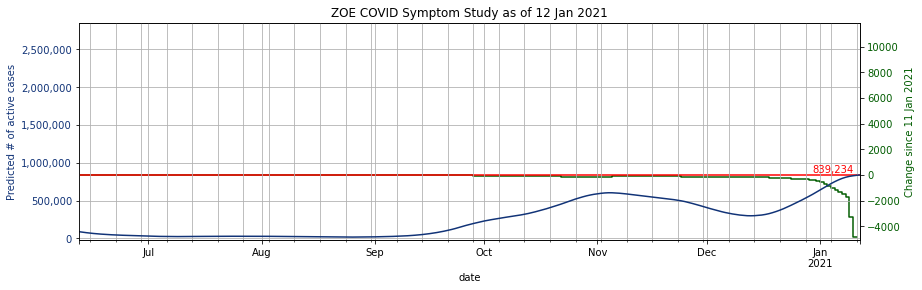

In [14]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

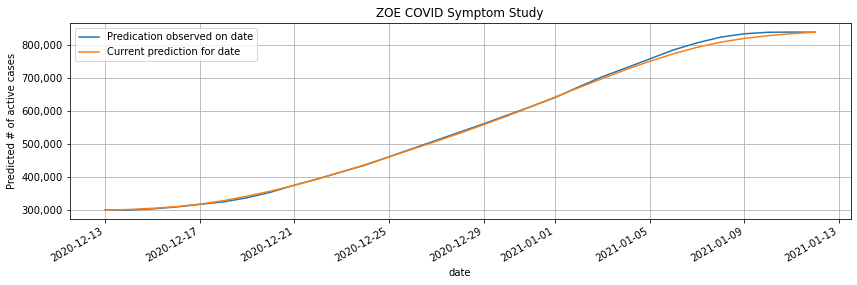

In [15]:
plot_study_evolution(curr_date, days=30)

In [16]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [17]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-01-12_2021-01-12-19-36.pickle


In [18]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
329,Denbighshire,W06000004,10.891883
342,Bridgend,W06000013,3.748951
379,Tower Hamlets,E09000030,3.158958
345,Enfield,E09000010,3.035213
369,Newham,E09000025,2.978466
352,Hounslow,E09000018,2.978111
312,Bexley,E09000004,2.845747
362,Lewisham,E09000023,2.787560
370,Redbridge,E09000026,2.742122
375,Southwark,E09000028,2.664650
